In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import aifc
import os
import tensorflow as tf
import random
import pandas as pd

try:
   import cPickle as pickle
except:
   import pickle

In [19]:
def get_file_sequence(file_name, header):
    return file_name.split('.')[0].split(header)[1]

In [20]:
from os import listdir
from os.path import isfile, join

data_loc = '../whale-inputs/data' 
train_folder = 'train'
file_path = os.path.join(data_loc,train_folder) #change to test if desired

file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]

In [21]:
print len(file_names)
print os.path.join(data_loc,train_folder,'specgrams')
print os.path.join(file_path, file_names[0])

30003
../whale-inputs/data/train/specgrams
../whale-inputs/data/train/train2100.aiff


In [22]:

from load_and_generate import open_pickle

data_loc = '../whale-inputs/data' 
train_folder = join(data_loc, 'train')
test_folder = join(data_loc, 'test')

train_datasets = open_pickle([train_folder])
#test_datasets = open_pickle([test_folder])



['../whale-inputs/data/train']


train6.aiff
../whale-inputs/data/train6.aiff
../whale-inputs/data/whales
train7.aiff
../whale-inputs/data/train7.aiff
../whale-inputs/data/whales
train9.aiff
../whale-inputs/data/train9.aiff
../whale-inputs/data/whales
train12.aiff
../whale-inputs/data/train12.aiff
../whale-inputs/data/whales
train28.aiff
../whale-inputs/data/train28.aiff
../whale-inputs/data/whales
train31.aiff
../whale-inputs/data/train31.aiff
../whale-inputs/data/whales
train32.aiff
../whale-inputs/data/train32.aiff
../whale-inputs/data/whales
train55.aiff
../whale-inputs/data/train55.aiff
../whale-inputs/data/whales
train64.aiff
../whale-inputs/data/train64.aiff
../whale-inputs/data/whales
train73.aiff
../whale-inputs/data/train73.aiff
../whale-inputs/data/whales
train74.aiff
../whale-inputs/data/train74.aiff
../whale-inputs/data/whales
train75.aiff
../whale-inputs/data/train75.aiff
../whale-inputs/data/whales
train77.aiff
../whale-inputs/data/train77.aiff
../whale-inputs/data/whales
train78.aiff
../whale-inputs/da

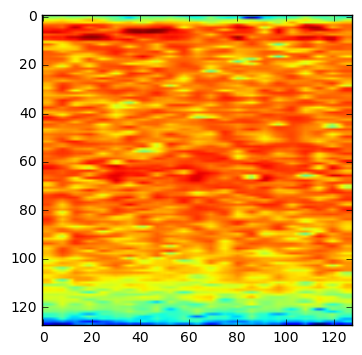

In [45]:
x= random.sample(train_datasets,1)
plt.imshow(train_datasets[1])
reload(load_and_generate)
from load_and_generate import *
load_and_generate.create_label_folders('../whale-inputs/data/', 'train','train.csv')

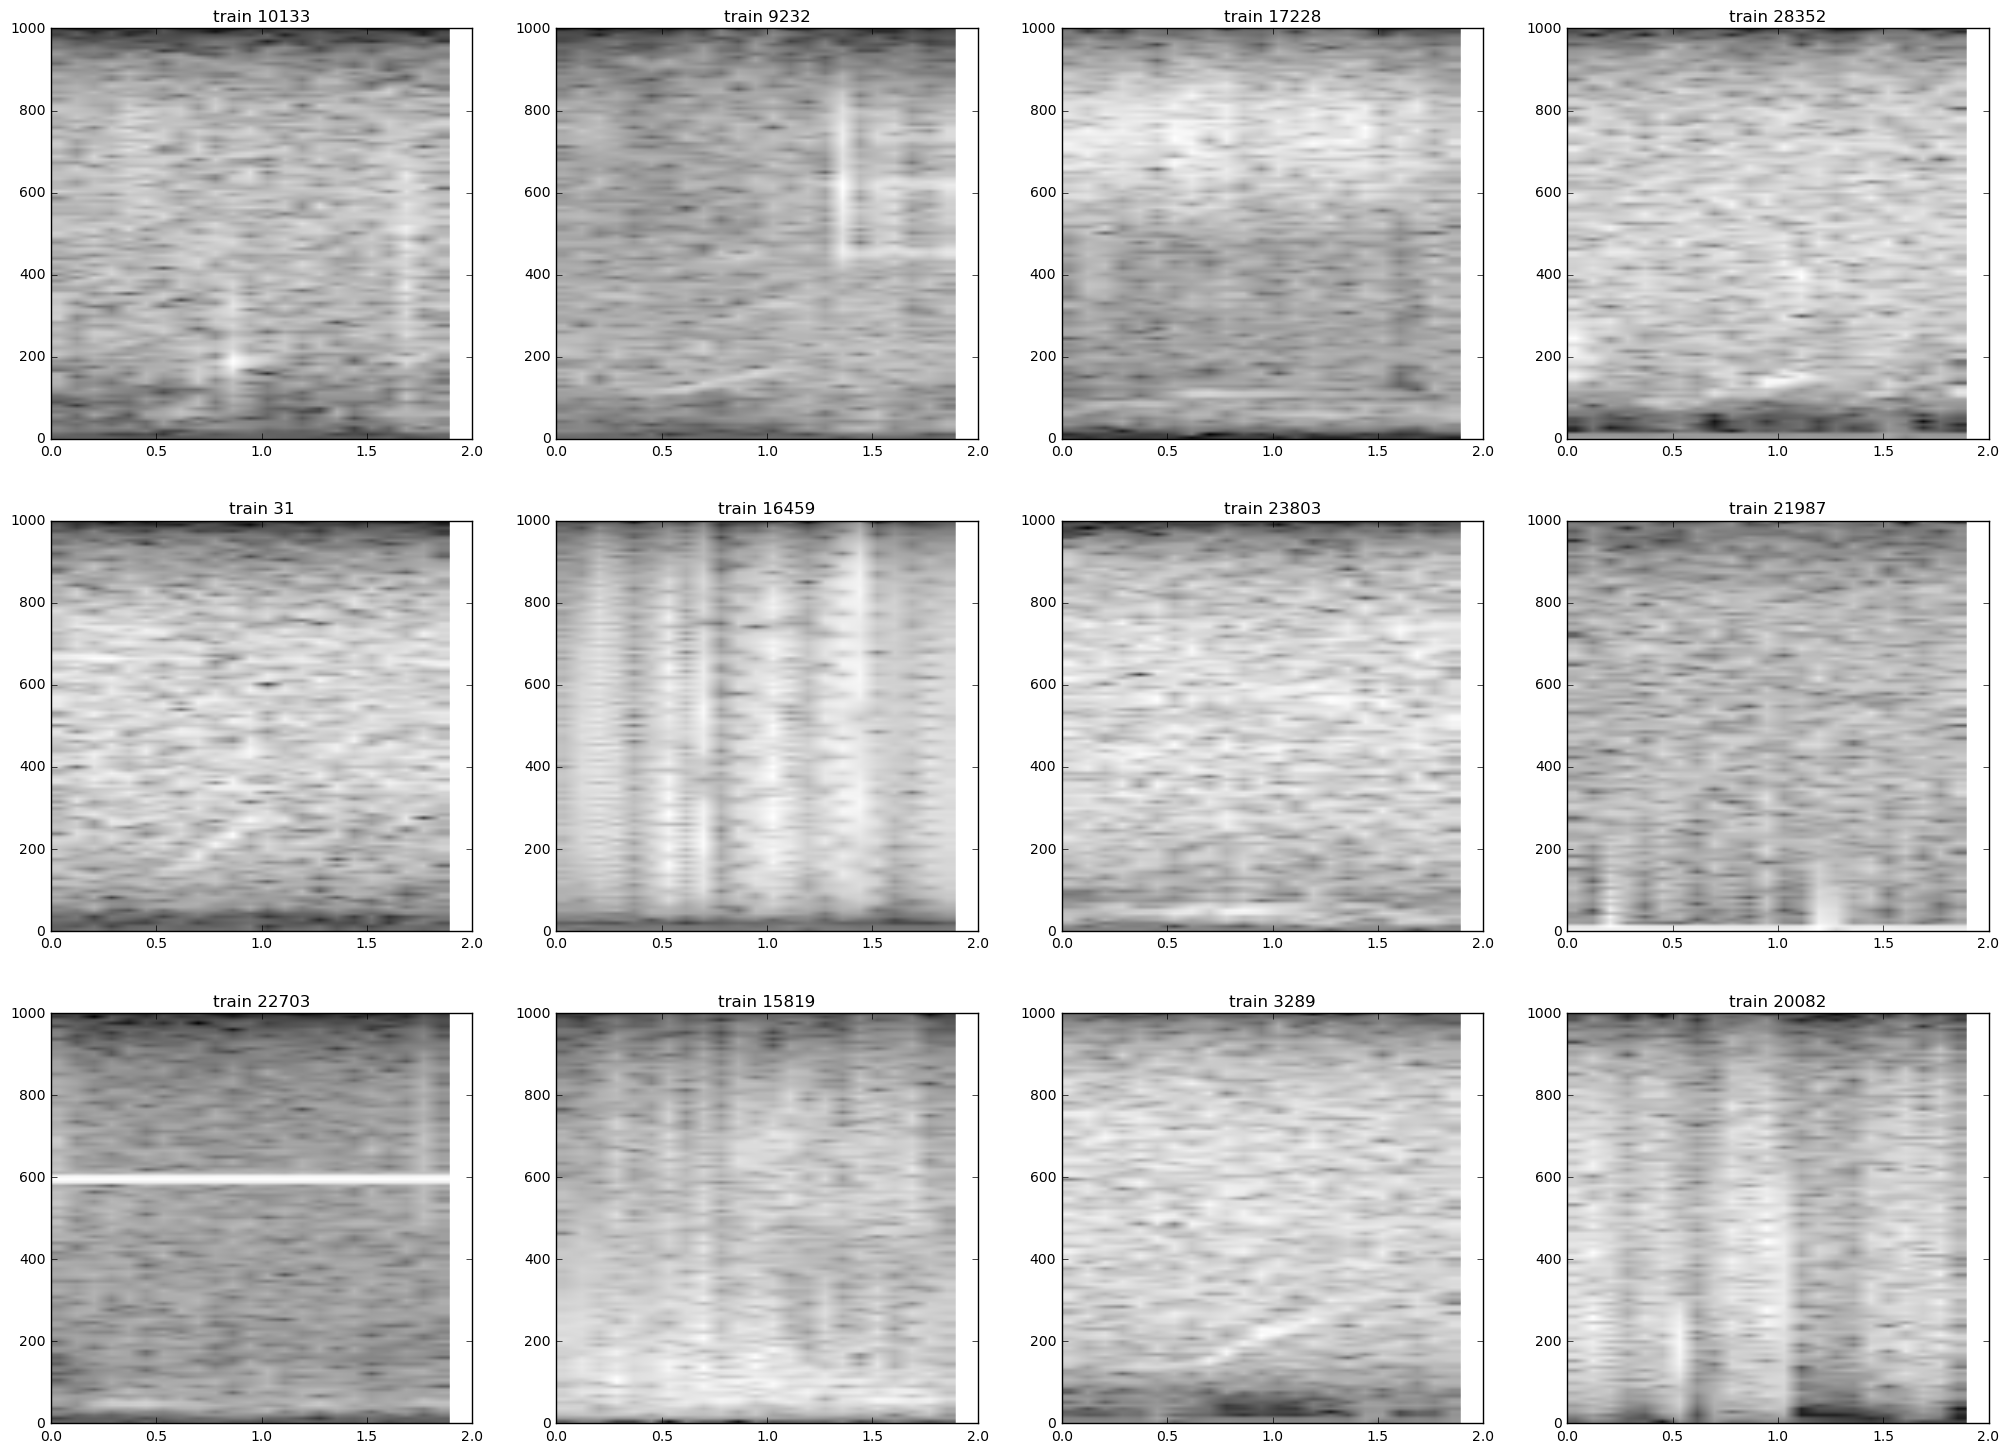

In [20]:
data_loc = '../whale-inputs/data' 
train_folder = 'train'
file_path = os.path.join(data_loc,train_folder) #change to test if desired

file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
plt.figure(figsize=(25.,18.))
N_plot = 12
for i, file_name in enumerate(random.sample(file_names,N_plot)):
    f = aifc.open(os.path.join(file_path,file_name), 'r')
    str_frames = f.readframes(f.getnframes())
    #Fs = f.getframerate()
    Fs = 2000
    time_data = np.fromstring(str_frames, np.short).byteswap()
    f.close()
 
    # spectrogram of file
    plt.subplot(N_plot/4, 4, i+1)
    Pxx, freqs, bins, im = plt.specgram(time_data,Fs=Fs,noverlap=90,cmap='gray')
    noise_power = 0.001 * Fs / 2
    plt.title(train_folder +' ' + get_file_sequence(file_name, train_folder) )

In [ ]:
print bins

In [ ]:
from scipy.misc import imresize

print Pxx.shape

from sklearn import preprocessing

#_Pxx = preprocessing.scale(Pxx)
Pxx_prep = imresize(np.log10(Pxx),(130,130), interp= 'lanczos').astype('float32')
Pxx_ = preprocessing.StandardScaler().fit_transform(Pxx_prep) #rescale by std
#%matplotlib notebook
from skimage.io import imread, imsave
#imsave('test.png', _Pxx)
plt.figure(figsize=(3.,3.))
#plt.imshow(20 * np.log10(imresize(Pxx_,(150,150), interp= 'bilinear')), origin='lower', cmap='gray', interpolation='None')
plt.imshow(Pxx_, origin='lower', cmap='gray', interpolation='None')
#http://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html
plt.gca().set_aspect('auto')
plt.show()

In [ ]:
from skimage.io import imread, imsave

In [ ]:
plt.figure(figsize=(25.,18.), dpi=250)
file_name = random.sample(file_names,1)[0]
print file_name
f = aifc.open(os.path.join(data_loc,train_folder, file_name), 'r')
str_frames = f.readframes(f.getnframes())
Fs = f.getframerate()
time_data = np.fromstring(str_frames, np.short).byteswap()
f.close()
 
    # spectrogram of file
plt.subplot(N_plot/4, 4, i+1)
Pxx, freqs, bins, im = plt.specgram(time_data,Fs=Fs,noverlap=90,cmap=plt.cm.gist_heat)
plt.axis('off')
         
plt.savefig(data_loc + '/'+ train_folder + '/'+ file_name.split('.')[0] + '.png', bbox_inches='tight')
plt.savefig(data_loc + '/'+ file_name.split('.')[0] + '.png', bbox_inches='tight')
#plt.imsave(data_loc + '/'+ file_name.split('.')[0] + '_im.png', Pxx)

In [39]:
batch_size = 50
hidden_nodes=1024
graph = tf.Graph()

beta_array = [0.002]

for beta in beta_array:
    with graph.as_default():

      # Input data. For the training data, we use a placeholder that will be fed
      # at run time with a training minibatch.
      tf_train_dataset = tf.placeholder(tf.float32,
                                        shape=(batch_size, image_size * image_size))
      tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
      tf_valid_dataset = tf.constant(valid_dataset)
      tf_test_dataset = tf.constant(test_dataset)

        # Variables.
      weights1 = tf.Variable(
                tf.truncated_normal([image_size * image_size, hidden_nodes]))
      biases1 = tf.Variable(tf.zeros([ hidden_nodes]))
      weights2 = tf.Variable(tf.truncated_normal([hidden_nodes,num_labels]))
      biases2 = tf.Variable(tf.zeros([num_labels]))


      def forward_prop(inp):
            h1 = tf.nn.relu(tf.matmul(inp, weights1)+biases1)
            
            return tf.matmul(h1,weights2) + biases2

      # Training computation.
      keep_prob = 0.5
      logits =  tf.nn.dropout(forward_prop(tf_train_dataset), keep_prob)

      print("beta: %.3f...\n"%beta)
    
      R = tf.nn.l2_loss(weights1)+tf.nn.l2_loss(weights2)+tf.nn.l2_loss(biases1)+tf.nn.l2_loss(biases2)
 
      loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels)+ beta*R)

      # Optimizer.
      global_step = tf.Variable(0)  # count the number of steps taken.
      learning_rate = tf.train.exponential_decay(0.1, global_step, 100000, 0.75, staircase=True)
      # tf.train.exponential_decay(learning_rate, global_step, decay_steps, decay_rate, staircase=False, name=None)
      optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)

      # Predictions for the training, validation, and test data.
      train_prediction = tf.nn.softmax(logits)
      valid_prediction = tf.nn.softmax(forward_prop(tf_valid_dataset))
      test_prediction = tf.nn.softmax(forward_prop(tf_test_dataset))

    num_steps = 8001

    with tf.Session(graph=graph) as session:
      tf.initialize_all_variables().run()
      print("Initialized")
      for step in range(num_steps):
        # Pick an offset within the training data, which has been randomized.
        # Note: we could use better randomization across epochs.
        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        # Generate a minibatch.
        batch_data = train_dataset[offset:(offset + batch_size), :]
        batch_labels = train_labels[offset:(offset + batch_size), :]
        # Prepare a dictionary telling the session where to feed the minibatch.
        # The key of the dictionary is the placeholder node of the graph to be fed,
        # and the value is the numpy array to feed to it.
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
        _, l, predictions = session.run(
          [optimizer, loss, train_prediction], feed_dict=feed_dict)
        if (step % 500 == 0):
          print("Minibatch loss at step %d: %f" % (step, l))
          print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
          print("Validation accuracy: %.1f%%" % accuracy(
            valid_prediction.eval(), valid_labels))
      print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))
      print("\n \n")

array([16061, 16973, 10870,  7168, 15637, 15081, 12740, 14861, 25481,
       21577, 16632, 10502])

In [41]:
file_names[np.random.randint(0, len(file_names), N_plot)]

TypeError: only integer arrays with one element can be converted to an index

In [54]:
data_loc = '../whale-inputs/data' 
train_folder = 'train'
file_path = os.path.join(data_loc,train_folder) #change to test if desired

ground_truth = pd.read_csv(data_loc + '/train.csv', index_col= 0)
ground_truth.index.name

'clip_name'

In [55]:
ground_truth.head(10)

label
clip_name          
train1.aiff       0
train2.aiff       0
train3.aiff       0
train4.aiff       0
train5.aiff       0
train6.aiff       1
train7.aiff       1
train8.aiff       0
train9.aiff       1
train10.aiff      0

In [57]:
df = pd.concat([ground_truth, pd.get_dummies(ground_truth.label)], axis=1); 
print(df.head(10))

whales = df[df[1]==1].index.values
no_whales = df[df[0]==1].index.values

              label    0    1
clip_name                    
train1.aiff       0  1.0  0.0
train2.aiff       0  1.0  0.0
train3.aiff       0  1.0  0.0
train4.aiff       0  1.0  0.0
train5.aiff       0  1.0  0.0
train6.aiff       1  0.0  1.0
train7.aiff       1  0.0  1.0
train8.aiff       0  1.0  0.0
train9.aiff       1  0.0  1.0
train10.aiff      0  1.0  0.0


In [58]:
import soundfile as sf
import sounddevice as sd
N_play= 15

print ("Blue whales sounding... \n")
for i, file_name in enumerate(random.sample(whales, N_play)):

    print ("Blue whale %d " %(i))
    data, fs = sf.read(file_path + '/' +file_name)
    sd.play(data, fs, blocking=True)

print('\n')
print ("No blue whales sounding... \n")    
for i, file_name in enumerate(random.sample(no_whales, N_play)):
    print ("Sound %d " %(i))
    data, fs = sf.read(file_path + '/' +file_name)
    sd.play(data, fs, blocking=True)
    


Blue whales sounding... 

Blue whale 0 
Blue whale 1 
Blue whale 2 
Blue whale 3 
Blue whale 4 
Blue whale 5 
Blue whale 6 
Blue whale 7 
Blue whale 8 
Blue whale 9 
Blue whale 10 
Blue whale 11 
Blue whale 12 
Blue whale 13 
Blue whale 14 


No blue whales sounding... 

Sound 0 
Sound 1 
Sound 2 
Sound 3 
Sound 4 
Sound 5 
Sound 6 
Sound 7 
Sound 8 
Sound 9 
Sound 10 
Sound 11 
Sound 12 
Sound 13 
Sound 14 


Blue whales sounding... 



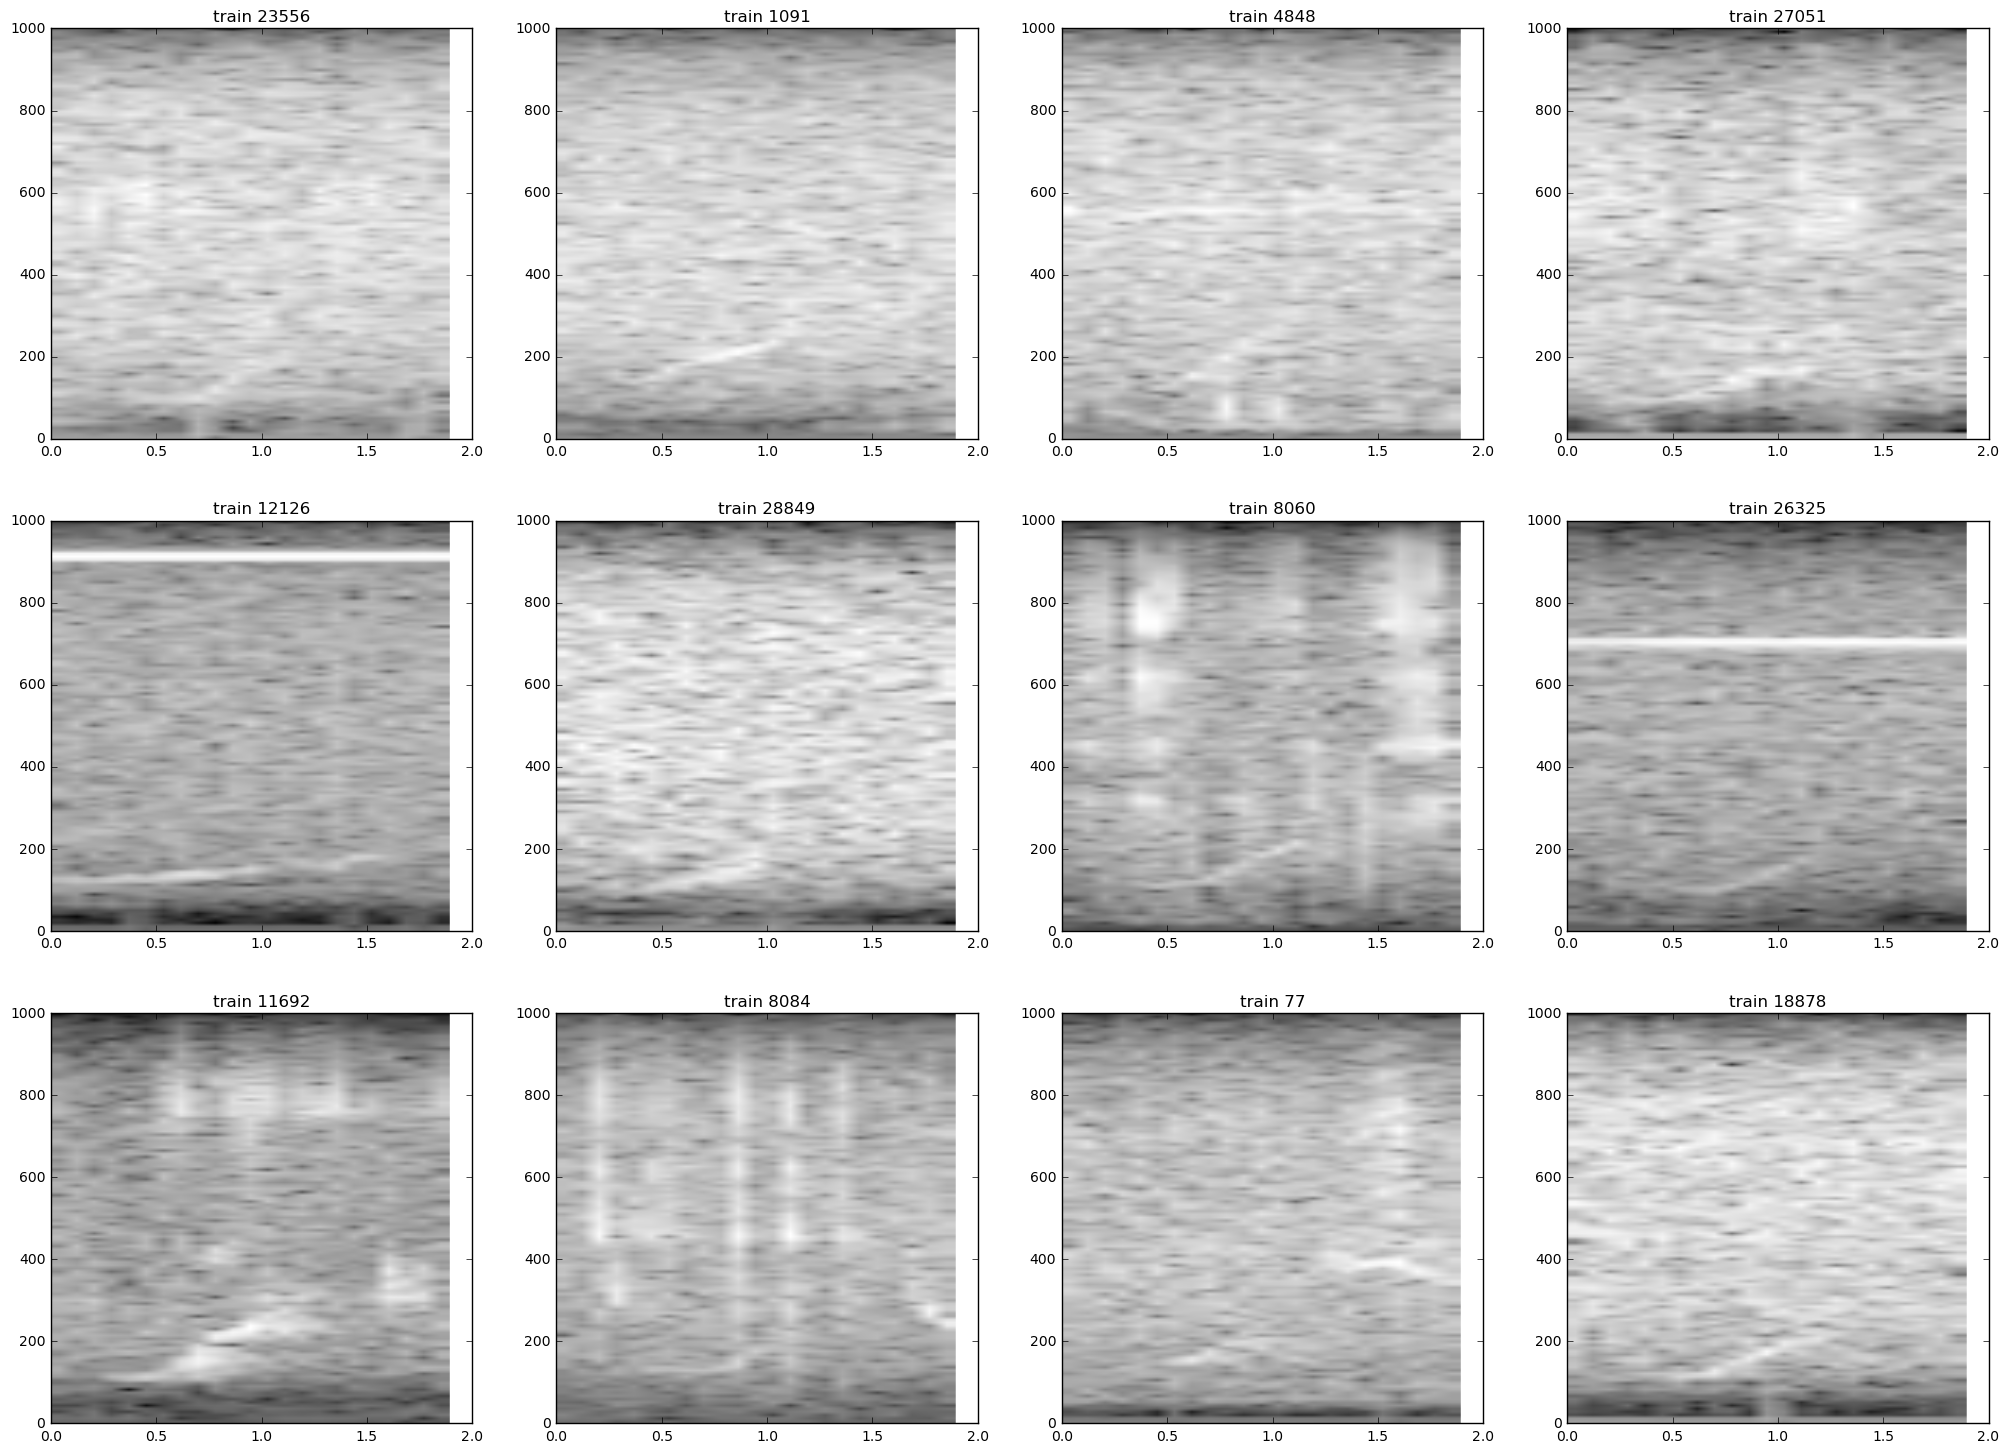



No blue whales sounding... 



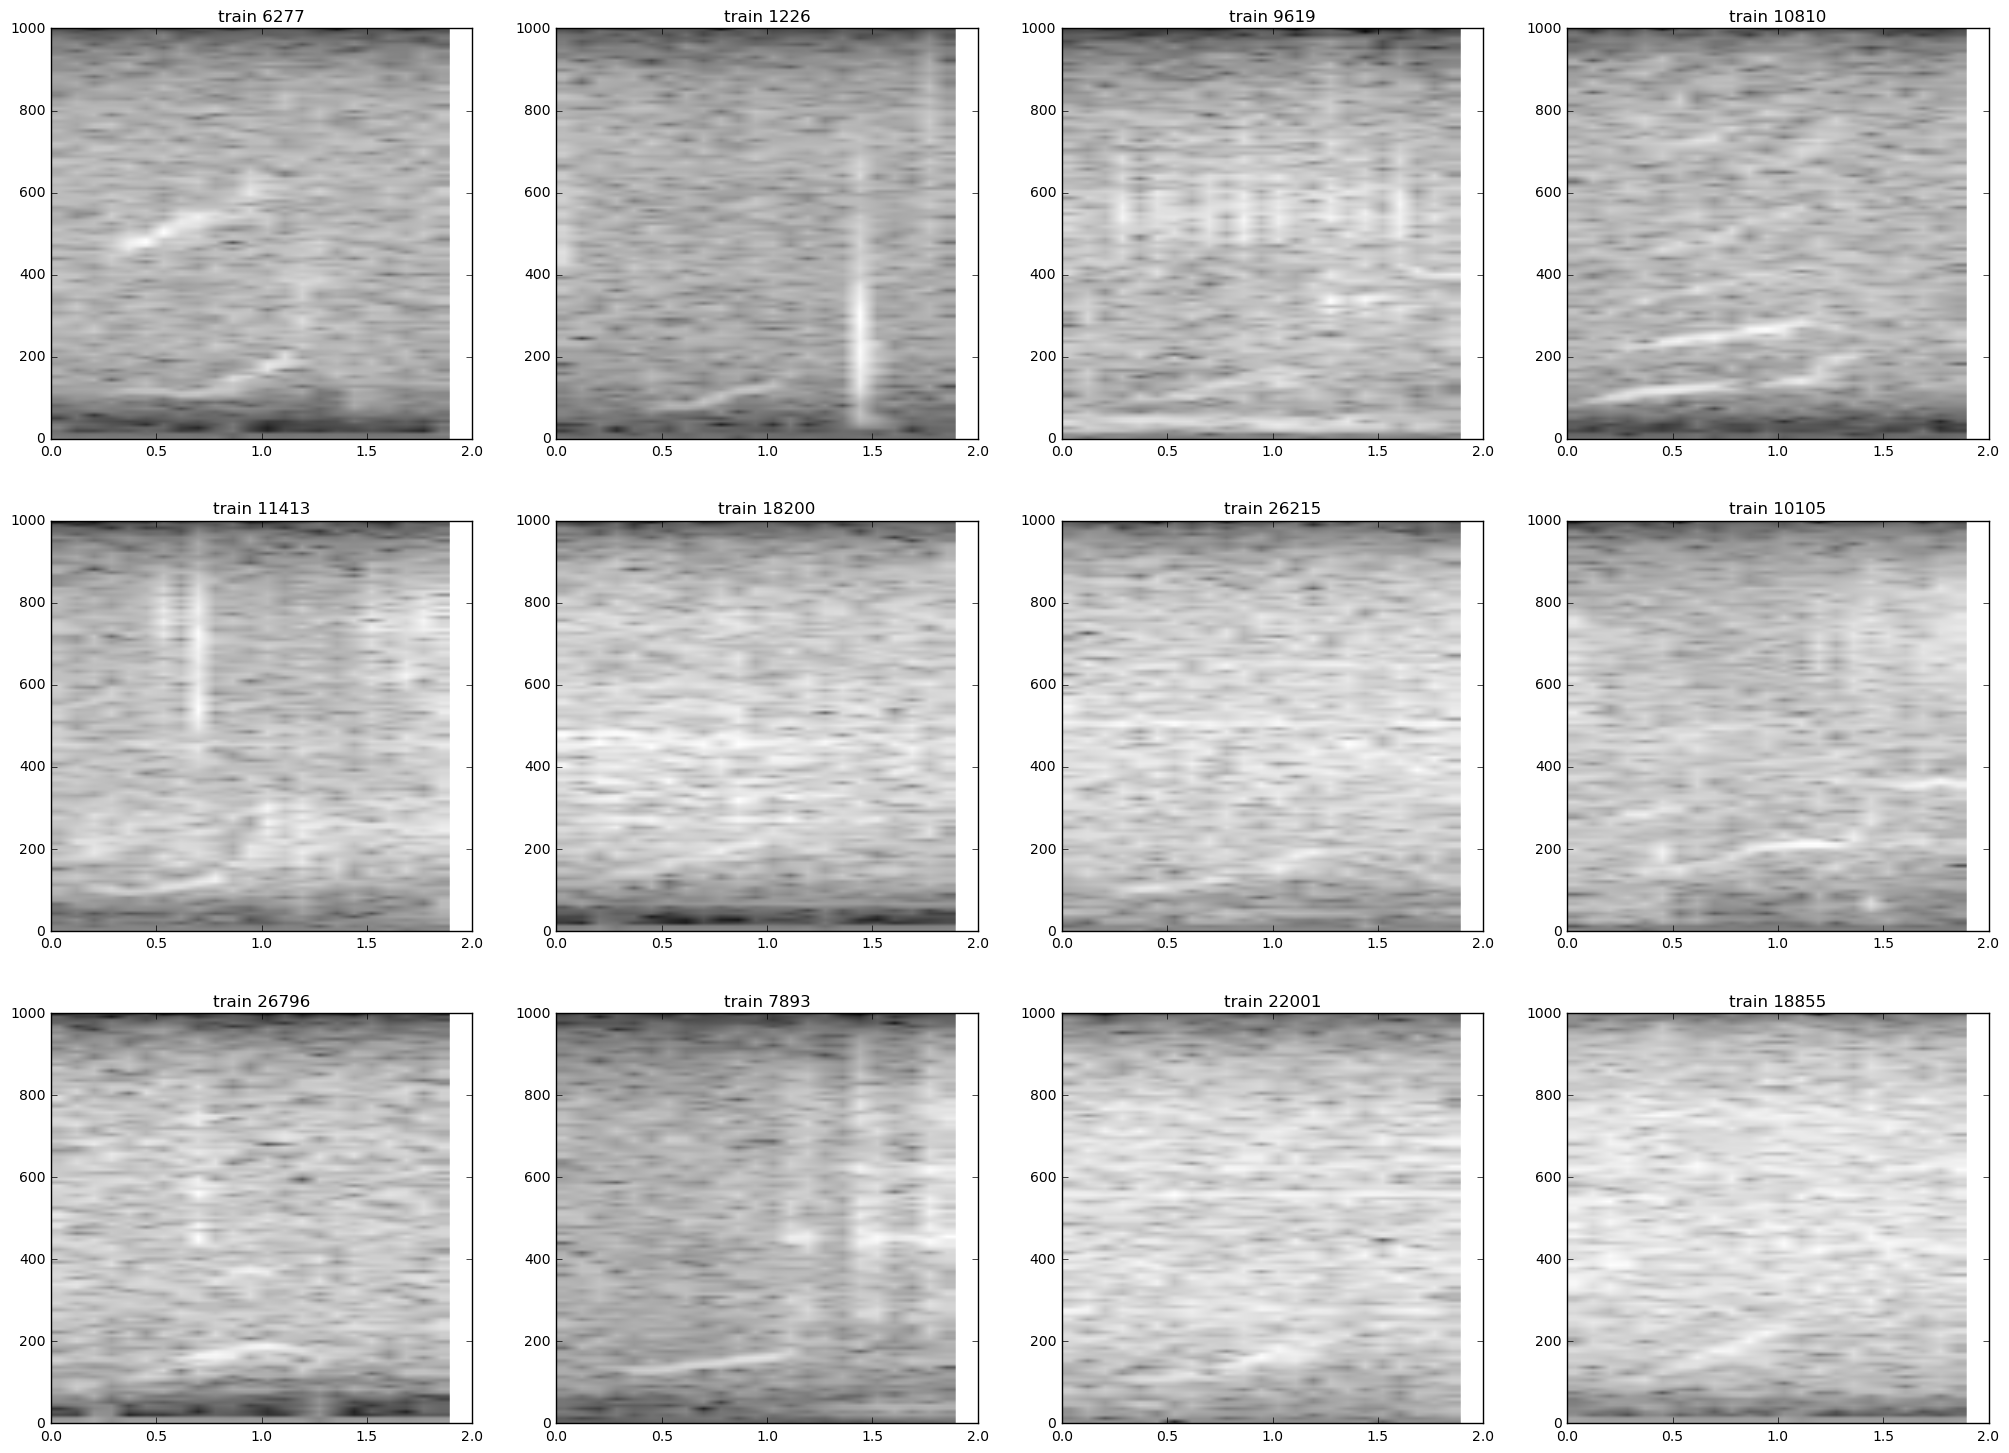

In [70]:
%matplotlib inline
plt.figure(figsize=(25.,18.))
N_plot = 12
print ("Blue whales sounding... \n")
for i, file_name in enumerate(random.sample(whales,N_plot)):
    f = aifc.open(os.path.join(file_path,file_name), 'r')
    str_frames = f.readframes(f.getnframes())
    #Fs = f.getframerate()
    Fs = 2000
    time_data = np.fromstring(str_frames, np.short).byteswap()
    f.close()
 
    # spectrogram of file
    plt.subplot(N_plot/4, 4, i+1)
    Pxx, freqs, bins, im = plt.specgram(time_data,Fs=Fs,noverlap=90,cmap='gray')
    noise_power = 0.001 * Fs / 2
    plt.title(train_folder +' ' + get_file_sequence(file_name, train_folder) )

plt.show()


plt.figure(figsize=(25.,18.))
N_plot = 12
print('\n')
print ("No blue whales sounding... \n")  
for i, file_name in enumerate(random.sample(whales,N_plot)):
    f = aifc.open(os.path.join(file_path,file_name), 'r')
    str_frames = f.readframes(f.getnframes())
    #Fs = f.getframerate()
    Fs = 2000
    time_data = np.fromstring(str_frames, np.short).byteswap()
    f.close()
 
    # spectrogram of file
    plt.subplot(N_plot/4, 4, i+1)
    Pxx, freqs, bins, im = plt.specgram(time_data,Fs=Fs,noverlap=90,cmap='gray')
    noise_power = 0.001 * Fs / 2
    plt.title(train_folder +' ' + get_file_sequence(file_name, train_folder) )
plt.show() 